In [1]:
import pandas as pd
import numpy as np

In [2]:
def theFunction(p,q,n):
    return p+np.random.rand(n)*(q-p)
theFunction(1,5,3)# from 1 to 5 generate 3 numbers

array([4.1805432 , 3.61416255, 3.45865165])

In [3]:
def getCropData(cropName,phmin,phmax,tempmin,tempmax,altmin,altmax,rfmin,rfmax,samplesize=30):
    
    crop= np.repeat(cropName,samplesize).reshape(samplesize,1)
    #ph 0-14
    ph = theFunction(phmin,phmax,samplesize)
    ph=ph.reshape(samplesize,1)   
    ph=np.round(ph,decimals=2) #rounding to 2 decimal places
    #temperature in degree celcius
    temp = np.round(theFunction(tempmin,tempmax,samplesize).reshape(samplesize,1),2)
    altitude = np.round(theFunction(altmin,altmax,samplesize).reshape(samplesize,1),2)
    rainfall = np.round(theFunction(rfmin,rfmax,samplesize).reshape(samplesize,1),2)
    #ph temp altitude rainfall crop
    return np.concatenate([ph,temp,altitude,rainfall,crop],axis=1)

In [4]:
pd.DataFrame(getCropData('RICE',5,6,25,30,0,3000,100,200,10),columns=['ph','temp','altitude','rainfall','crop'])

,ph,temp,altitude,rainfall,crop
0,5.86,26.14,2285.45,110.52,RICE
1,5.86,26.12,2235.28,183.12,RICE
2,5.48,26.73,1703.03,198.55,RICE
3,5.82,29.88,2257.29,142.93,RICE
4,5.14,28.93,2651.35,139.43,RICE
5,5.51,28.0,2241.2,162.99,RICE
6,5.07,28.46,2032.09,154.18,RICE
7,5.03,29.62,2619.23,147.8,RICE
8,5.48,29.65,2860.45,173.29,RICE
9,5.45,29.51,2877.97,142.25,RICE


In [92]:
#cropName,phmin,phmax,tempmin,tempmax,altmin,altmax,rfmin,rfmax,samplesize=30
#ricedata=getCropData('RICE',5,6,25,30,0,3000,100,200,200)

maizedata = getCropData('MAIZE',5.5,7,25,30,0,2200,600,900,1000)
paddydata = getCropData('PADDY',6,7,20,25,0,3000,25,150,1000)
milletdata = getCropData('MILLET',5,6,15,20,0,2100,450,650,1000)
barleydata = getCropData('BARLEY',6,7.5,15,17,0.2000,390,430,1000)
cerealsdata = getCropData('CEREAL',5.5,6.5,21,24,1600,2600,200,300 )
oilseeddata=getCropData('OILSEED',4.5,8,18,24,0,2400,25,500)
potatodata=getCropData('POTATO',4.8,5.5,12,25,1500,4200,500,700)
jutedata=getCropData('JUTE',4.8,5.8,24,38,0,1000,800,1000)
pulsedata=getCropData('PULSE',4.5,6.5,20,35,0,2400,100,400)
tobaccodata=getCropData('TOBACCO',5.8,6.5,24,27,0,2000,500,1250)
sugarcanedata=getCropData('SUGARCANE',5,8.5,15,45,0,1000,500,800)
cottondata=getCropData('COTTON',6,6.5,18,30,0,2100,500,700)
cardamomdata=getCropData('CARDAMOM',5.5,6.5,30,80,600,1200,1500,2150)
beandata=getCropData('BEAN',6,6.5,14,32,1000,2100,200,400)
mustarddata=getCropData('MUSTARD',5,5.7,7,25,0,3000,625,1000)


data=np.concatenate([maizedata,paddydata,milletdata,barleydata,cerealsdata,oilseeddata,potatodata,jutedata,pulsedata,tobaccodata,sugarcanedata,cottondata,cardamomdata,beandata,mustarddata],axis=0)

np.random.shuffle(data)
df=pd.DataFrame(data,columns=['ph','temp','altitude','rainfall','crop'])
df.to_csv('crops.csv')

In [93]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [94]:
#shaping features and target and splitting data into training and testing sets 
X = data[:,0:4:1] # start:stop:stepsize
Y = data[:,4:]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.5)

In [164]:
from sklearn.linear_model import LogisticRegression

In [168]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
def setParams(c=1.0,iter=1000):
    #cv vaneko cross validation ko lagi no of folds (for stratified k folding)
    score=cross_val_score(LogisticRegression(C=c,multi_class='auto',max_iter=1000),X.astype(np.float64),Y.ravel(),cv=4)
    print(score)
    plt.scatter(c,score[2])

/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.80614657 0.79905437 0.8177458  0.82134293]


/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.86524823 0.86288416 0.88369305 0.87170264]


/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.88179669 0.87943262 0.89688249 0.90047962]


/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.89125296 0.89243499 0.90527578 0.90527578]


/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.89479905 0.89952719 0.91007194 0.91007194]


/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.89479905 0.90189125 0.91007194 0.90767386]


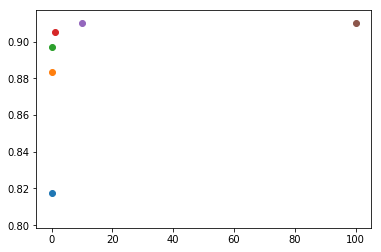

In [169]:
clist=[0.001,0.01,0.1,1,10,100]
for c in clist:
    setParams(c)

In [170]:
lrmodel=LogisticRegression(C=100,max_iter=2000,multi_class='auto')
lrmodel.fit(x_train,y_train)

/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [171]:
linearRegressionScore=lrmodel.score(x_test.astype(np.float64),y_test)
linearRegressionScore

0.9041666666666667

In [172]:
lrmodel.classes_

array(['BARLEY', 'BEAN', 'CARDAMOM', 'CEREAL', 'COTTON', 'JUTE', 'MAIZE',
       'MILLET', 'MUSTARD', 'OILSEED', 'PADDY', 'POTATO', 'PULSE',
       'SUGARCANE', 'TOBACCO'], dtype='<U32')

In [173]:
def giveSuggestions(features,model,numberOfSuggestions=3):
    predictProbabilities=model.predict_proba([features.astype(np.float64)]) 
    indeces=predictProbabilities[0].argsort()[-numberOfSuggestions:][::-1]
    print("Suggestions in decresing of their priorities",indeces)
    print(model.predict([features.astype(np.float64)]))
    for i in range(len(indeces)):
        print(i," : ",model.classes_[indeces[i]]," ")


In [175]:
#giveSuggestions(features,trainedModel, no of suggestions of crops from best crops to leat favourable crop)
giveSuggestions(x_test[10],lrmodel,4)
print("\n\n Y_TEST VALUE =>",y_test[10])

Suggestions in decresing of their priorities [6 5 7 2]
['MAIZE']
0  :  MAIZE  
1  :  JUTE  
2  :  MILLET  
3  :  CARDAMOM  


 Y_TEST VALUE => ['JUTE']


In [14]:
#!pip install --user --upgrade git+https://github.com/jpmml/sklearn2pmml.git

In [176]:
from sklearn.externals import joblib

In [177]:
#exporting the trained model
joblib.dump(lrmodel, 'model.joblib', compress=9)



['model.joblib']

In [178]:
lrmodel.class_weight

In [180]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lrmodel.predict(x_test.astype(np.float64))))

              precision    recall  f1-score   support

      BARLEY       1.00      0.65      0.79        17
        BEAN       0.00      0.00      0.00        18
    CARDAMOM       1.00      0.40      0.57        15
      CEREAL       1.00      0.08      0.15        12
      COTTON       0.00      0.00      0.00        17
        JUTE       0.00      0.00      0.00        19
       MAIZE       0.84      1.00      0.91       506
      MILLET       0.91      1.00      0.95       487
     MUSTARD       0.00      0.00      0.00        14
     OILSEED       0.00      0.00      0.00        15
       PADDY       0.97      1.00      0.99       496
      POTATO       1.00      0.38      0.55        16
       PULSE       1.00      0.22      0.36        18
   SUGARCANE       0.67      0.11      0.18        19
     TOBACCO       0.00      0.00      0.00        11

   micro avg       0.90      0.90      0.90      1680
   macro avg       0.56      0.32      0.36      1680
weighted avg       0.86   

/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [186]:
#before Hyperparameters Tuning
from sklearn.model_selection import cross_val_score
print(cross_val_score(LogisticRegression(),X.astype(np.float64),Y.ravel()))
from sklearn.metrics import classification_report
print(classification_report(y_test,lrmodel.predict(x_test.astype(np.float64))))

/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gg/anaconda3/lib/python3.6/site-packages/sklearn

[0.89572193 0.89901698 0.89812332]
              precision    recall  f1-score   support

      BARLEY       1.00      0.65      0.79        17
        BEAN       0.00      0.00      0.00        18
    CARDAMOM       1.00      0.40      0.57        15
      CEREAL       1.00      0.08      0.15        12
      COTTON       0.00      0.00      0.00        17
        JUTE       0.00      0.00      0.00        19
       MAIZE       0.84      1.00      0.91       506
      MILLET       0.91      1.00      0.95       487
     MUSTARD       0.00      0.00      0.00        14
     OILSEED       0.00      0.00      0.00        15
       PADDY       0.97      1.00      0.99       496
      POTATO       1.00      0.38      0.55        16
       PULSE       1.00      0.22      0.36        18
   SUGARCANE       0.67      0.11      0.18        19
     TOBACCO       0.00      0.00      0.00        11

   micro avg       0.90      0.90      0.90      1680
   macro avg       0.56      0.32      0.36  

/home/gg/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [181]:
# from sklearn.model_selection import StratifiedKFold
# StratifiedKFold(n_splits=5,X.astype,Y)